In [ ]:
#The objective of this program is to show case the scratch code of KNN Algorithm and the Python library version of it
#The objective is to predict the heart Failure given the 12 explanatory variables:



In [158]:
import pandas as pd
import numpy as np
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#In order to import a csv file pandas's method read_csv is used , the first argument is the path , the path should be defined by "/" , other argument is sep="," defining the delimiter
data=pd.read_csv(".../heart_failure_clinical_records_dataset.csv")

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [123]:
# From Scratch KNN

def KNN(k,train_X,test_X,train_Y):
    pred=[]
    for i in range(len(test_X)):
        lis=[]
        for j in range(len(train_X)):
            sum=pd.Series.sum((train_X.iloc[j,:]-test_X.iloc[i,:])**2)
            lis.append([sum,train_Y.iloc[j]])
        lis.sort()
        list1=[item[1] for item in lis[0:k]]
        try:
            pred.append(mode(list1))
        
        except:
            pred.append('null')
    return pred
            
    

In [112]:
x=data.drop(['DEATH_EVENT'],axis=1)
y=data.DEATH_EVENT

In [113]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.20,random_state=42)

In [146]:
pr=KNN(3,train_X,test_X,train_Y)

In [147]:
confusion_matrix(test_Y,pr)

array([[31,  4],
       [24,  1]], dtype=int64)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [152]:
y_pred=classifier.predict(test_X)

In [153]:
confusion_matrix(test_Y,y_pred)

array([[32,  3],
       [24,  1]], dtype=int64)

In [159]:
classification_report(test_Y,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.57      0.91      0.70        35\n           1       0.25      0.04      0.07        25\n\n    accuracy                           0.55        60\n   macro avg       0.41      0.48      0.39        60\nweighted avg       0.44      0.55      0.44        60\n'

In [162]:
# Graphical approch
error=[]

for i in range(1,40):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(train_X,train_Y)
    pred_y=classifier.predict(test_X)
    error.append(np.mean(pred_y!=test_Y))

In [166]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

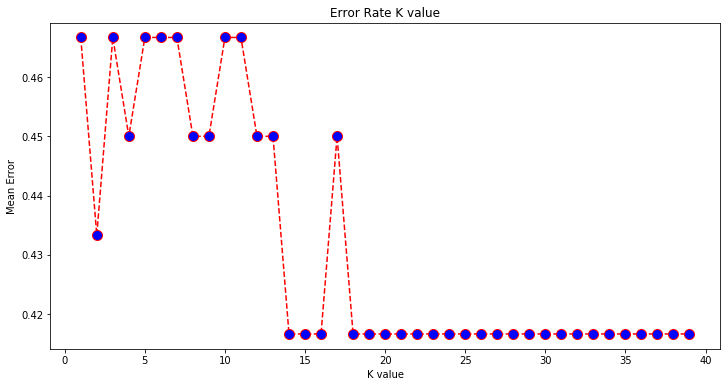

In [171]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker="o",markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')